In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [33]:
df=pd.read_csv("cleaned.csv")

In [34]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [35]:
data=df.drop(["sl_no", "salary", "ssc_b", "hsc_b"], axis=1)

## Checking categorical variable

In [36]:
data

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [37]:
cat_col=data.select_dtypes(object).columns.tolist()
len(cat_col)

6

- We have 6 categorical variable.

## Lebel Encoding
- Now we convert categorical data into numerical format.

In [38]:
le = LabelEncoder()
data[cat_col] =data[cat_col].astype('str').apply(le.fit_transform)
data

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,1,77.60,0,0,91.0,0,74.49,1
211,1,58.00,60.00,2,72.00,2,0,74.0,0,53.62,1
212,1,67.00,67.00,1,73.00,0,1,59.0,0,69.72,1
213,0,74.00,66.00,1,58.00,0,0,70.0,1,60.23,1


## Checking correlation of each feature with status

In [39]:
CORR=data.corr()["status"].sort_values()
CORR

specialisation   -0.250655
degree_t         -0.020352
hsc_s             0.033442
mba_p             0.076922
gender            0.090670
etest_p           0.127639
workex            0.276060
degree_p          0.479861
hsc_p             0.491228
ssc_p             0.607889
status            1.000000
Name: status, dtype: float64

- The feature ssc_p, hsc_p and degree_p is more correlated as compare to other features.

# Binary classification

### Decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [41]:
X=data[["gender", "ssc_p", "hsc_p", "hsc_s", "degree_p", "degree_t", "workex", "specialisation", "etest_p", "mba_p"]]
Y=data["status"]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.23)

In [51]:
len(Y_test)

50

In [52]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, Y_train)
Y_pred = dtree.predict(X_test)

In [53]:
accuracy_score(Y_test, Y_pred)

0.82

In [54]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        18
           1       0.85      0.88      0.86        32

    accuracy                           0.82        50
   macro avg       0.81      0.80      0.80        50
weighted avg       0.82      0.82      0.82        50



### Random forest

In [55]:
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred=random_forest.predict(X_test)

In [56]:
random_forest

RandomForestClassifier()

In [57]:
len(Y_test)

50

In [58]:
accuracy_score(Y_test, Y_pred)

0.9

In [59]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.89      0.97      0.93        32

    accuracy                           0.90        50
   macro avg       0.91      0.87      0.89        50
weighted avg       0.90      0.90      0.90        50



## Feature importance

In [60]:
rows = list(X.columns)
imp = pd.DataFrame(np.zeros(6*len(rows)).reshape(2*len(rows), 3))
imp.columns = ["Classifier", "Feature", "Importance"]
#Add Rows
for index in range(0, 2*len(rows), 2):
    imp.iloc[index] = ["DecisionTree", rows[index//2], (100*dtree.feature_importances_[index//2])]
    imp.iloc[index + 1] = ["RandomForest", rows[index//2], (100*random_forest.feature_importances_[index//2])]

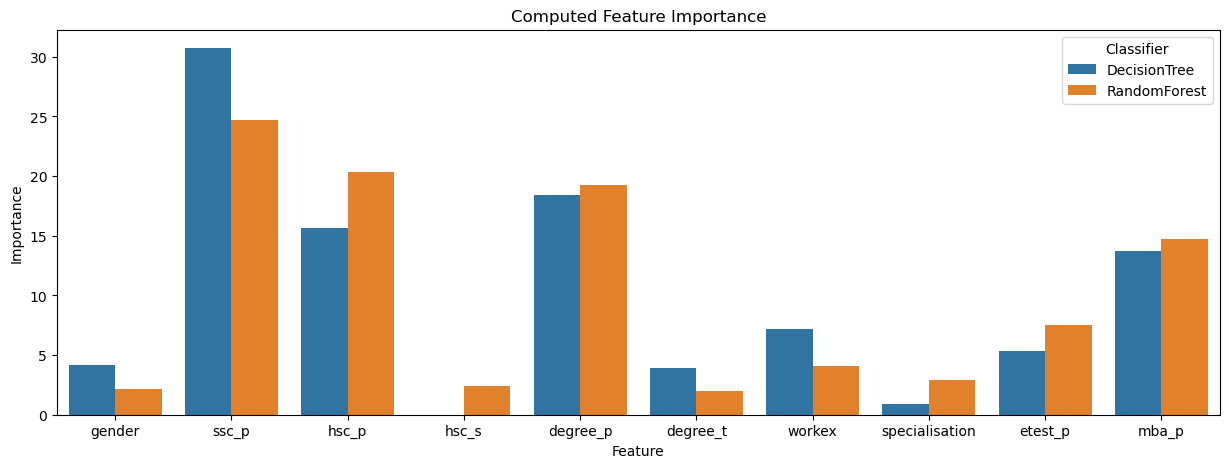

In [61]:
plt.figure(figsize=(15,5))
sns.barplot("Feature", "Importance", hue="Classifier", data=imp)
plt.title("Computed Feature Importance")
plt.show()

#### Insights
- The most affecting features are ssc_p, hsc_p and degree_p.
- The least affecting features are hsc_s and specialisation.

### Logistic regression

In [64]:
X1=data[["gender", "ssc_p", "hsc_p", "hsc_s", "degree_p", "degree_t", "workex", "specialisation", "etest_p", "mba_p"]]
Y1=data["status"]

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1_scaled = scaler.fit_transform(X1)

In [66]:
X1_scaled

array([[1.        , 0.53823954, 0.88962109, ..., 1.        , 0.10416667,
        0.28448276],
       [1.        , 0.79241394, 0.68088962, ..., 0.        , 0.76041667,
        0.56484258],
       [1.        , 0.49701093, 0.5107084 , ..., 0.        , 0.52083333,
        0.2470015 ],
       ...,
       [1.        , 0.53823954, 0.49423394, ..., 0.        , 0.1875    ,
        0.69377811],
       [0.        , 0.68253968, 0.47775947, ..., 1.        , 0.41666667,
        0.33808096],
       [1.        , 0.43516801, 0.34596376, ..., 1.        , 0.8125    ,
        0.33770615]])

In [67]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_scaled, Y1, test_size=0.25)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X1_train, Y1_train)
Y1_pred = logistic_reg.predict(X1_test)

In [70]:
accuracy_score(Y1_test, Y1_pred)

0.8888888888888888

In [66]:
print(classification_report(Y1_test, Y1_pred))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.84      0.91      0.87        34

    accuracy                           0.83        54
   macro avg       0.83      0.81      0.81        54
weighted avg       0.83      0.83      0.83        54



## Conclusion

- Accuracy score of decision tree is 82%
- Accuracy score of random forest is 90%
- Accuracy score of logistic regression is 88.88%